# EDA

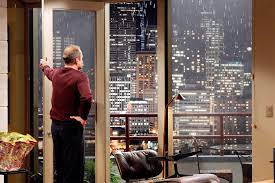

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
data_f = pd.read_csv('./data/King_County_House_prices_dataset.csv', parse_dates=[1])


In [3]:
# explorating data
"""for item in data_f.columns:
    print(f'item: {item}, {data_f[item].unique()}')"""
# checking columns
data_f.info
# checking for null values
data_f.isnull()


id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21592  False  False  False     False      False        False     False   
21593  False  False  False     False      False        False     False   
21594  False  False  False     False      False        False     False   
21595  False  False  False     False      False        False     False   
21596  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0       False        True  False  ...  False       False          False   
1       False       False  False  ...  False       False          False   
2       False       False  False  ...  False       False          False   
3       False       False  False  ...  False       False          False   
4       False       False  False  ...  False       False          False   
...       ...         ...    ...  ...    ...         ...            ...   
21592   False       False  False  ...  False       False          False   
21593   False       False  False  ...  False       False          False   
21594   False       False  False  ...  False       False          False   
21595   False        True  False  ...  False       False          False   
21596   False       False  False  ...  False       False          False   

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0         False         False    False  False  False          False   
1         False         False    False  False  False          False   
2         False          True    False  False  False          False   
3         False         False    False  False  False          False   
4         False         False    False  False  False          False   
...         ...           ...      ...    ...    ...            ...   
21592     False         False    False  False  False          False   
21593     False         False    False  False  False          False   
21594     False         False    False  False  False          False   
21595     False         False    False  False  False          False   
21596     False         False    False  False  False          False   

       sqft_lot15  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
21592       False  
21593       False  
21594       False  
21595       False  
21596       False  

[21597 rows x 21 columns]

- create new columns: 

In [4]:
# create new column for m2
data_f['m2_living'] = data_f['sqft_living'] / 10.746
data_f['m2_lot'] = data_f['sqft_lot'] / 10.746

# create a new column y_m
data_f['year_month']= data_f['date'].dt.strftime('%Y-%m')

# create a new column price / sqft_living living because Mr. Hansen is interested in living there
data_f['sqft_price'] = data_f['price'] / data_f['sqft_living']
data_f.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.000         3      1.000         1180   
1  6414100192 2014-12-09 538000.000         3      2.250         2570   
2  5631500400 2015-02-25 180000.000         2      1.000          770   
3  2487200875 2014-12-09 604000.000         4      3.000         1960   
4  1954400510 2015-02-18 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode    lat  \
0      5650   1.000         NaN 0.000  ...         0.000    98178 47.511   
1      7242   2.000       0.000 0.000  ...      1991.000    98125 47.721   
2     10000   1.000       0.000 0.000  ...           NaN    98028 47.738   
3      5000   1.000       0.000 0.000  ...         0.000    98136 47.521   
4      8080   1.000       0.000 0.000  ...         0.000    98074 47.617   

      long  sqft_living15  sqft_lot15  m2_living  m2_lot  year_month  \
0 -122.257           1340        5650    109.808 525.777     2014-10   
1 -122.319           1690        7639    239.159 673.925     2014-12   
2 -122.233           2720        8062     71.655 930.579     2015-02   
3 -122.393           1360        5000    182.393 465.289     2014-12   
4 -122.045           1800        7503    156.337 751.908     2015-02   

   sqft_price  
0     188.051  
1     209.339  
2     233.766  
3     308.163  
4     303.571  

[5 rows x 25 columns]

### cleaning data

In [5]:
# fill NaN Values

data_f.fillna(0, inplace=True)



#### outliers

In [6]:
# possible outlier
data_33b = data_f[(data_f['bedrooms'] >33)] #outlier 150m2 for 33 bedrooms, means 4m2 each room. outlier


# remove row with bedroom value ==33
data_f.drop(data_f.loc[data_f['bedrooms'] == 33].index, inplace=True)



In [7]:
#Removing all Outliers or data not of interest

# remove more than 100 years and no renovated
m100_no_ren = data_f[(data_f['yr_built'] <=1938) & (data_f['yr_renovated']==0)] # 1366 VALUES
#m100_no_ren.sort_values('yr_built').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)

data_f.drop(data_f.loc[(data_f['yr_built'] <=1938) & (data_f['yr_renovated']==0)].index, inplace=True) # 18 868

# choosing only with bedrooms > 4
data_f.drop(data_f.loc[data_f['bedrooms'] <4].index, inplace=True) # now 7899
data_f.shape# shape (8817, 21)

# remove condition 1
data_f.drop(data_f.loc[(data_f['condition'] ==1)].index, inplace=True) # 7898

# remove m2_living < 100
# not really

# remove all price over 2M
data_f.drop(data_f.loc[(data_f['price'] >=1500000)].index, inplace=True) # 7530

#TODO remove waterfront



In [8]:
#space to look for anomalities

data_exp = data_f[(data_f['date'] >='2015-05-01')]
# 
# data_exp = data_f[(data_f['date'] >='2014-05-01')& (data_f['date'] >'2014-06-01')] # 23 vs 21 586

#data_33b.sort_values('yr_built').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)
# remove more than 100 years and no renovated
#m100_no_ren = data_f[(data_f['yr_built'] <=1920) & (data_f['yr_renovated']==0)] # 1366 VALUES
#m100_no_ren.sort_values('yr_built').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)
n = data_exp.sort_values('date').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)
#n.date.tail(10)



In [9]:
# correlation matrix
"""corr_data = data_f.drop(['id',], axis = 1)
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket")"""

'corr_data = data_f.drop([\'id\',], axis = 1)\nplt.figure(figsize=(20, 17))\nmatrix = np.triu(corr_data.corr())\nsns.heatmap(corr_data.corr(), annot=True,\n            linewidth=.8, mask=matrix, cmap="rocket")'

In [10]:
# visual inspection of variables
data_exp.sort_values('sqft_price').sqft_price.describe() 


#data_f.price.plot(kind='box')

#sns.histplot(data = data_f, x='sqft_price')

count   198.000
mean    225.136
std      83.296
min     100.000
25%     162.848
50%     204.455
75%     275.481
max     517.241
Name: sqft_price, dtype: float64

## 1Q: Is the price influenced by the number of rooms?


<AxesSubplot:xlabel='condition', ylabel='Count'>

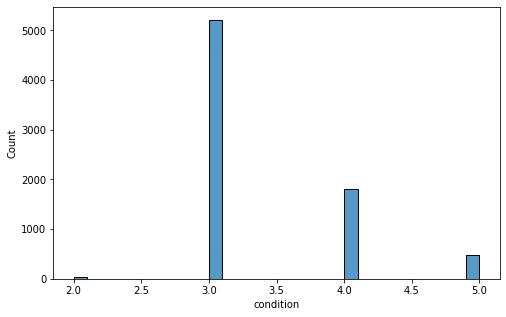

In [11]:
# near inspection into price data
data_f.sort_values('condition').id.describe() 
# mean  ≠658774.377

#data_f.price.plot(kind='box')
sns.histplot(data = data_f, x='condition')
#TODO maybe I can take it to show the distribution of the prices for houses with more than 4 bedrooms

In [12]:
# bedrooms against price
# group by bedrooms, computing mean, min and max for plot
bedroom_price_mean = data_f.groupby(['bedrooms']).mean().price.reset_index() # TODO generate the standard deviation
bedroom_price_min = data_f.groupby(['bedrooms']).min().price.reset_index()
bedroom_price_max = data_f.groupby(['bedrooms']).max().price.reset_index()
bedroom_price_max

bedrooms       price
0         4 1490000.000
1         5 1490000.000
2         6 1490000.000
3         7 1240000.000
4         8  900000.000
5         9 1280000.000
6        10 1150000.000
7        11  520000.000

In [13]:
# concat

bedroom_price_df = pd.concat([bedroom_price_max, bedroom_price_mean, bedroom_price_min],
        axis=1,
        keys=['max', 'mean', 'min'],
        ignore_index=False, 
        join ='inner'
        )                       # TODO do the dataframe more beatifull
                                # TODO maybe a merge?  
bedroom_price_df




max                 mean                 min           
  bedrooms       price bedrooms      price bedrooms      price
0        4 1490000.000        4 572852.834        4 100000.000
1        5 1490000.000        5 642325.551        5 133000.000
2        6 1490000.000        6 638801.505        6 175000.000
3        7 1240000.000        7 658072.036        7 280000.000
4        8  900000.000        8 559428.571        8 340000.000
5        9 1280000.000        9 865000.000        9 450000.000
6       10 1150000.000       10 900000.000       10 650000.000
7       11  520000.000       11 520000.000       11 520000.000

In [14]:
#rename the columns DO only once
bedroom_price_df.columns = ['_'.join(col).strip() for col in bedroom_price_df.columns.values]


In [15]:
bedroom_price_df
# TODO remove the other bedrooms, only a column is enough

max_bedrooms   max_price  mean_bedrooms  mean_price  min_bedrooms  \
0             4 1490000.000              4  572852.834             4   
1             5 1490000.000              5  642325.551             5   
2             6 1490000.000              6  638801.505             6   
3             7 1240000.000              7  658072.036             7   
4             8  900000.000              8  559428.571             8   
5             9 1280000.000              9  865000.000             9   
6            10 1150000.000             10  900000.000            10   
7            11  520000.000             11  520000.000            11   

   min_price  
0 100000.000  
1 133000.000  
2 175000.000  
3 280000.000  
4 340000.000  
5 450000.000  
6 650000.000  
7 520000.000

Text(0.5, 1.0, 'Real State Price depending on Bedrooms')

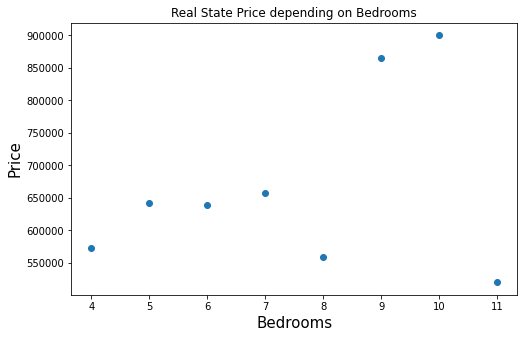

In [16]:
# plot
plt.figure()

sc = plt.scatter(bedroom_price_df.max_bedrooms,
            bedroom_price_df.mean_price,
            cmap='viridis',
            )
#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Real State Price depending on Bedrooms')

# TODO better scale
# TODO why with higher amount


## Q1-1 Does the renovation relates to the bedrooms and the price?

In [17]:
# bedrooms against price
# group by bedrooms, computing mean, min and max for plot
bedroom_price_mean = data_f[['bedrooms', 'price', 'condition']].groupby(['bedrooms']).mean().reset_index() # TODO generate the standard deviation
bedroom_price_min = data_f[['bedrooms', 'price', 'condition']].groupby(['bedrooms']).min().reset_index()
bedroom_price_max = data_f[['bedrooms', 'price', 'condition']].groupby(['bedrooms']).max().reset_index()
bedroom_price_mean

bedrooms      price  condition
0         4 572852.834      3.351
1         5 642325.551      3.411
2         6 638801.505      3.433
3         7 658072.036      3.357
4         8 559428.571      3.143
5         9 865000.000      3.000
6        10 900000.000      3.500
7        11 520000.000      3.000

In [18]:
# concat 
bedroom_price_cond_df = pd.concat([bedroom_price_max, bedroom_price_mean, bedroom_price_min],
        axis=1,
        keys=['max', 'mean', 'min'],
        ignore_index=False, 
        join ='inner'
        )                       # TODO do the dataframe more beatifull
                                # TODO maybe a merge?  
bedroom_price_cond_df

max                           mean                           min  \
  bedrooms       price condition bedrooms      price condition bedrooms   
0        4 1490000.000         5        4 572852.834     3.351        4   
1        5 1490000.000         5        5 642325.551     3.411        5   
2        6 1490000.000         5        6 638801.505     3.433        6   
3        7 1240000.000         5        7 658072.036     3.357        7   
4        8  900000.000         4        8 559428.571     3.143        8   
5        9 1280000.000         3        9 865000.000     3.000        9   
6       10 1150000.000         4       10 900000.000     3.500       10   
7       11  520000.000         3       11 520000.000     3.000       11   

                        
       price condition  
0 100000.000         2  
1 133000.000         2  
2 175000.000         2  
3 280000.000         3  
4 340000.000         3  
5 450000.000         3  
6 650000.000         3  
7 520000.000         3

In [19]:
#rename the columns DO only once
bedroom_price_cond_df.columns = ['_'.join(col).strip() for col in bedroom_price_cond_df.columns.values]

In [20]:
bedroom_price_cond_df # TODO not really a explanation

max_bedrooms   max_price  max_condition  mean_bedrooms  mean_price  \
0             4 1490000.000              5              4  572852.834   
1             5 1490000.000              5              5  642325.551   
2             6 1490000.000              5              6  638801.505   
3             7 1240000.000              5              7  658072.036   
4             8  900000.000              4              8  559428.571   
5             9 1280000.000              3              9  865000.000   
6            10 1150000.000              4             10  900000.000   
7            11  520000.000              3             11  520000.000   

   mean_condition  min_bedrooms  min_price  min_condition  
0           3.351             4 100000.000              2  
1           3.411             5 133000.000              2  
2           3.433             6 175000.000              2  
3           3.357             7 280000.000              3  
4           3.143             8 340000.000              3  
5           3.000             9 450000.000              3  
6           3.500            10 650000.000              3  
7           3.000            11 520000.000              3

Text(0.5, 1.0, 'Real State Price depending on Bedrooms')

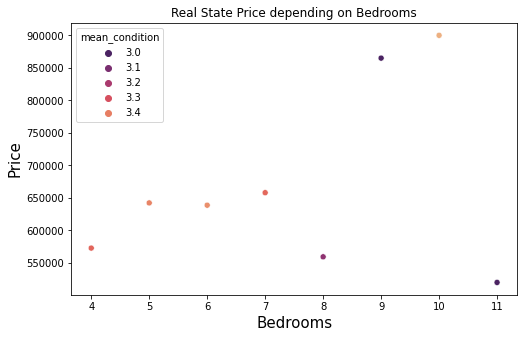

In [21]:
# plot
import seaborn as sns
plt.figure()


sc = sns.scatterplot(data=bedroom_price_cond_df,
            x = 'max_bedrooms',
            y = 'mean_price',
            hue='mean_condition',
            palette="flare_r",
            )
#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Real State Price depending on Bedrooms')


# TODO better scale
# TODO outlier at 10?


Text(0.5, 1.0, 'Real State Price depending square feet living')

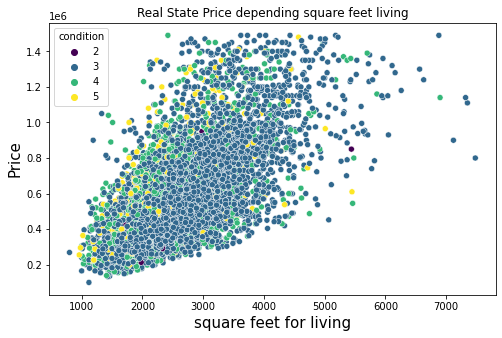

In [22]:
# plotting without mean
# plot
import seaborn as sns
plt.figure()

# TODO irgendwas ist falsch
sc = sns.scatterplot(data=data_f,
            x = 'sqft_living',
            y = 'price',
            hue='condition',
            palette="viridis",
            #hue_order=(5,8)
            )
#plt.grid(True)
plt.xlabel('square feet for living', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Real State Price depending square feet living')

Text(0.5, 1.0, 'Bedrooms against m2')

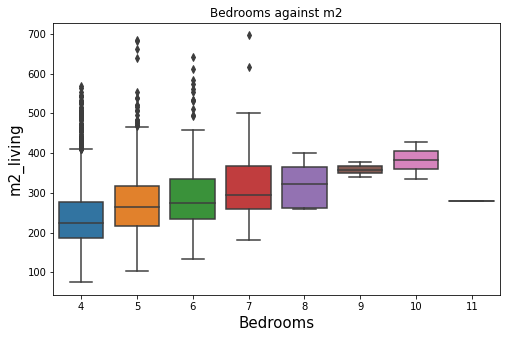

In [23]:
# plotting without mean
# plot
import seaborn as sns
import numpy as np

plt.figure()


sc = sns.boxplot(data=data_f,
            x = 'bedrooms',
            y = 'm2_living',
            #hue='price',
            #palette="flare_r",
            )
#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('m2_living', fontsize=15)
plt.title('Bedrooms against m2')

## Q2: Time dependency?

In [24]:
# explorating data
# data_f.date.describe()

In [25]:
# near inspection into size data
data_f.sort_values('m2_living').m2_living.describe() 

#data_f.m2_living.plot(kind='hist')

count   7530.000
mean     243.841
std       73.363
min       74.446
25%      191.699
50%      232.645
75%      285.688
max      696.073
Name: m2_living, dtype: float64

In [26]:
# create a new column y_m
data_f['year_month']= data_f['date'].dt.strftime('%Y-%m') # 7899 values

# create a new column price / sqft_living
data_f['sqft_price'] = data_f['price'] / data_f['sqft_living']
data_f.head()

id       date       price  bedrooms  bathrooms  sqft_living  \
3   2487200875 2014-12-09  604000.000         4      3.000         1960   
5   7237550310 2014-05-12 1230000.000         4      4.500         5420   
15  9297300055 2015-01-24  650000.000         4      3.000         2950   
20  6300500875 2014-05-14  385000.000         4      1.750         1620   
22  7137970340 2014-07-03  285000.000         5      2.500         2270   

    sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode    lat  \
3       5000   1.000       0.000 0.000  ...         0.000    98136 47.521   
5     101930   1.000       0.000 0.000  ...         0.000    98053 47.656   
15      5000   2.000       0.000 3.000  ...         0.000    98126 47.571   
20      4980   1.000       0.000 0.000  ...         0.000    98133 47.703   
22      6300   2.000       0.000 0.000  ...         0.000    98092 47.327   

       long  sqft_living15  sqft_lot15  m2_living   m2_lot  year_month  \
3  -122.393           1360        5000    182.393  465.289     2014-12   
5  -122.005           4760      101930    504.374 9485.390     2014-05   
15 -122.375           2140        4000    274.521  465.289     2015-01   
20 -122.341           1400        4980    150.754  463.428     2014-05   
22 -122.169           2240        7005    211.241  586.265     2014-07   

    sqft_price  
3      308.163  
5      226.937  
15     220.339  
20     237.654  
22     125.551  

[5 rows x 25 columns]

In [27]:
# plot
import plotly.express as px
"""
px.scatter(sqft_price_year_month_mean, 
           x='year_month', 
           y='sqft_price', 
           #size='bedrooms', 
           #color='condition', 
           title='Price changes in time',
           #template='ggplot2',
           #labels=dict(year_month ="Date", price="Price", weather="Condition")
           )
 """          

'\npx.scatter(sqft_price_year_month_mean, \n           x=\'year_month\', \n           y=\'sqft_price\', \n           #size=\'bedrooms\', \n           #color=\'condition\', \n           title=\'Price changes in time\',\n           #template=\'ggplot2\',\n           #labels=dict(year_month ="Date", price="Price", weather="Condition")\n           )\n '

In [28]:
data_f = data_f.sort_values('year_month', ascending=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


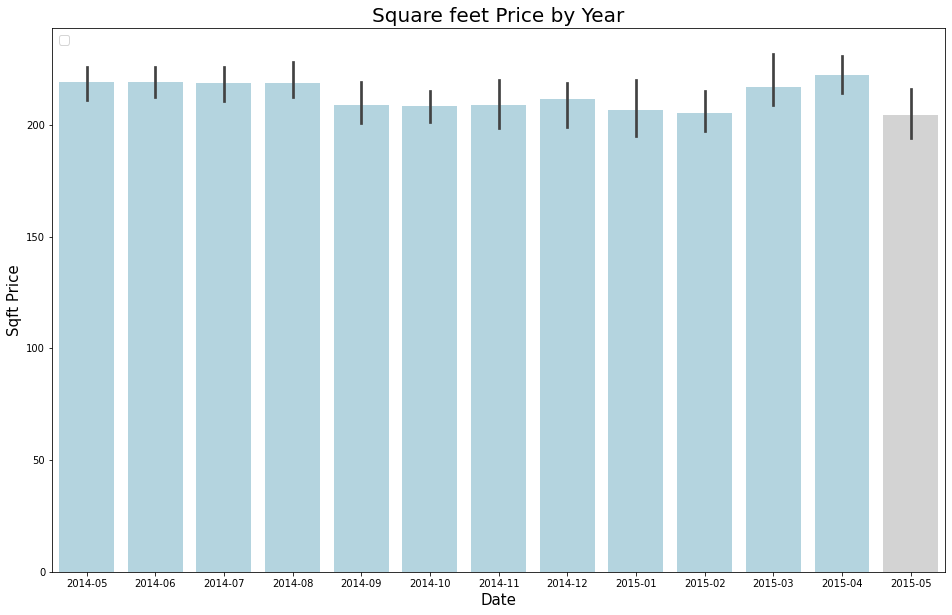

"# clrs = ['grey' if (y<max(values) else )]#\nvalues = np.array([2,5,3,6,4,7,1])   \nidx = np.array(list('abcdefg')) \nclrs = ['grey' if (x < max(values)) else 'red' for x in values ]\nsb.barplot(x=idx, y=values, palette=clrs) # color=clrs)\n"

In [125]:
import seaborn as sns
from numpy import median

#TODO set different color to the last bar
fig, ax = plt.subplots(figsize=(16,10))
# set last bar with an other color:

rank = data_f.sqft_price.argsort().argsort()
pal = sns.color_palette("Blues_d", len(data_f.sqft_price))
palette=np.array(pal[::-1])[rank]
#type(np.array(pal[::-1])[rank])

sns.barplot(x='year_month', y='sqft_price', data=data_f, 
            #hue='weather'
            estimator=median,
            color='lightblue',
            #palette=np.array(pal[::-1])[rank] # set last bar with an other color:
            #palette=['grey' if (y<max('year_month')) else 'red' for y in 'year_month' ],
            palette=['lightblue' for x in range(12)] + ['lightgrey']
            #hue=
            )


#ax = sns.barplot(objects, y_pos, palette=np.array(pal[::1])[rank])


plt.xlabel('Date', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
#plt.ylim(150)
plt.show()


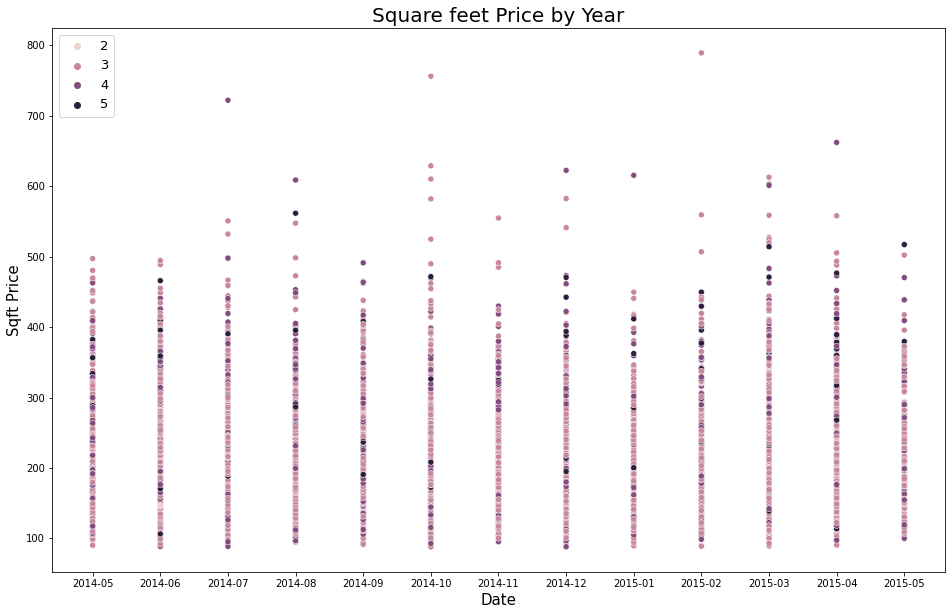

In [30]:
import seaborn as sns
from numpy import median


fig, ax = plt.subplots(figsize=(16,10))

sns.scatterplot(x='year_month', y='sqft_price', data=data_f, 
            hue='condition',
            estimator=median,
            #color='midtblue'
            )
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
#plt.ylim(150)
plt.show(); 

## Q3: location

In [31]:
# previous see the data

In [32]:
# plot map with seaborn
fig = px.scatter_mapbox(data_f, lat="lat", lon="long", 
                        hover_name="sqft_price", 
                        hover_data=["sqft_price"],
                        #color_discrete_sequence=["blue"], 
                        color='sqft_price',
                        zoom=8, width=800, height=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

In [33]:
# group by zipcode
price_zipcode = data_f.groupby(['zipcode']).mean().reset_index() #72 rows
price_zipcode.sort_values('zipcode')

zipcode             id       price  bedrooms  bathrooms  sqft_living  \
0     98001 4806739426.851  325424.541     4.122      2.368     2308.027   
1     98002 4751623513.966  271360.948     4.362      2.418     2161.293   
2     98003 4925099934.221  356884.211     4.232      2.411     2524.084   
3     98004 4035948592.293 1026538.444     4.333      2.381     2644.949   
4     98005 4967133464.039  820105.373     4.343      2.517     2886.500   
..      ...            ...         ...       ...        ...          ...   
65    98177 3593231340.448  665616.146     4.260      2.398     2627.604   
66    98178 4220031543.347  358485.568     4.263      2.116     2185.263   
67    98188 4786838663.000  333098.946     4.321      2.321     2260.661   
68    98198 5784176354.822  351862.078     4.200      2.231     2208.456   
69    98199 3396522572.825  901870.463     4.200      2.541     2762.625   

    sqft_lot  floors  waterfront  view  ...  sqft_above  yr_built  \
0  13364.851   1.649       0.000 0.122  ...    2047.959  1990.581   
1   8014.259   1.474       0.000 0.000  ...    1947.914  1981.586   
2  10859.484   1.437       0.000 0.505  ...    2020.684  1980.484   
3  12608.778   1.333       0.000 0.061  ...    2066.465  1967.859   
4  21678.186   1.265       0.000 0.157  ...    2239.147  1968.549   
..       ...     ...         ...   ...  ...         ...       ...   
65 10703.281   1.354       0.000 0.781  ...    1946.875  1964.656   
66  7657.032   1.263       0.053 0.737  ...    1551.474  1966.053   
67  9972.786   1.366       0.000 0.232  ...    1769.875  1974.250   
68 11614.711   1.389       0.022 0.678  ...    1798.456  1971.622   
69  6129.613   1.431       0.000 0.575  ...    1926.625  1966.088   

    yr_renovated    lat     long  sqft_living15  sqft_lot15  m2_living  \
0          0.000 47.315 -122.271       2040.682    9967.595    214.780   
1        103.017 47.309 -122.212       1745.241    8460.914    201.125   
2         21.168 47.318 -122.310       2228.074   10100.253    234.886   
3        201.939 47.613 -122.202       2571.919   12200.980    246.133   
4         39.245 47.613 -122.167       2646.186   20280.500    268.612   
..           ...    ...      ...            ...         ...        ...   
65       125.302 47.746 -122.370       2246.354   10360.396    244.519   
66        84.263 47.499 -122.245       1775.158    7629.663    203.356   
67         0.000 47.447 -122.280       1741.429    9722.161    210.372   
68        88.511 47.390 -122.315       1897.722    9930.744    205.514   
69       200.188 47.648 -122.399       2201.775    6011.663    257.084   

     m2_lot  sqft_price  
0  1243.705     142.579  
1   745.790     127.894  
2  1010.561     142.366  
3  1173.346     398.884  
4  2017.326     293.251  
..      ...         ...  
65  996.025     256.360  
66  712.547     165.531  
67  928.046     150.163  
68 1080.840     160.129  
69  570.409     333.242  

[70 rows x 22 columns]

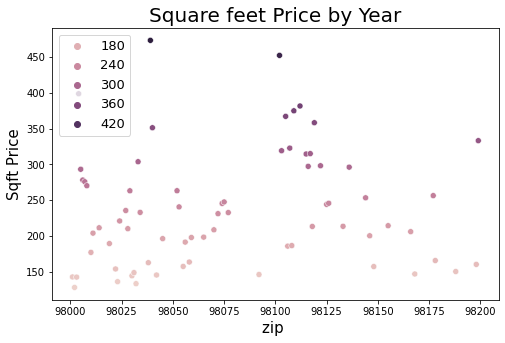

In [34]:


fig, ax = plt.subplots()

sns.scatterplot(x='zipcode', y='sqft_price', data=price_zipcode, 
            hue='sqft_price',
            #estimator=median,
            #color='midtblue'
            )
plt.xlabel('zip ', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
#plt.ylim(150)
plt.show();

In [35]:
#plotting sqft_price in map divided by 
fig = px.scatter_mapbox(price_zipcode, lat="lat", lon="long", 
                        hover_name="sqft_price", 
                        hover_data=["sqft_price"],
                        #color_discrete_sequence=["blue"], 
                        color='sqft_price',
                        size='sqft_price',
                        #size='bedrooms',
                        zoom=8, width=800, height=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

## q4: do in the cheaper sale prices a lot of houses to buy?

In [36]:
# count the 
zipcode_count = data_f.groupby(['zipcode']).size().to_frame('Count').reset_index() #72 rows
zipcode_count.sort_values('zipcode')

zipcode  Count
0     98001    148
1     98002     58
2     98003     95
3     98004     99
4     98005    102
..      ...    ...
65    98177     96
66    98178     95
67    98188     56
68    98198     90
69    98199     80

[70 rows x 2 columns]

In [37]:
# concat with zipcode_prices:

price_zipcode_count = price_zipcode.merge(zipcode_count, on='zipcode')

# sort by the highest amount to buy and show the first 20
price_zipcode_count.sort_values('Count',ascending=False).head(20).drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)




price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
28  707745.151     4.245      2.581     2729.916 11465.141   1.656      3.302   
5   837015.596     4.351      2.690     3049.263 12370.140   1.488      3.653   
33  555981.286     4.236      2.619     2766.775 11275.627   1.797      3.272   
23  414582.026     4.102      2.595     2558.199 21323.162   1.923      3.086   
38  792880.691     4.185      2.873     3236.803 17113.039   1.871      3.178   
37  741779.618     4.189      2.673     3049.639 14457.555   1.855      3.092   
22  546525.944     4.264      2.438     2377.130 10728.750   1.368      3.421   
32  388312.037     4.223      2.387     2403.195 22224.284   1.544      3.456   
26  356925.340     4.163      2.506     2496.522 20317.182   1.749      3.354   
13  322739.010     4.139      2.399     2408.876 10468.443   1.443      3.368   
15  687123.542     4.295      2.745     2984.711 32231.584   1.724      3.395   
21  845375.005     4.207      2.629     2792.287 10729.622   1.593      3.410   
31  477417.471     4.259      2.484     2519.241  9064.012   1.635      3.471   
40  370627.309     4.133      2.503     2553.388 27050.182   1.782      3.242   
29  807586.193     4.124      2.792     3381.273 47299.963   1.935      3.075   
62  463405.439     4.303      2.295     2230.839 10937.226   1.316      3.432   
34  620063.185     4.219      2.854     3155.033  9968.874   1.967      3.033   
25 1029900.755     4.371      2.680     3006.993 13245.815   1.526      3.874   
7   612730.201     4.369      2.230     2314.463 10587.671   1.151      3.711   
0   325424.541     4.122      2.368     2308.027 13364.851   1.649      3.203   

    grade  sqft_above  yr_built  yr_renovated  sqft_living15  sqft_lot15  \
28  8.443    2407.299  1988.903        20.101       2562.799   10194.547   
5   8.849    2369.895  1980.618        49.214       2829.723   11694.614   
33  8.254    2611.159  1995.533        29.051       2616.935   10868.707   
23  7.974    2471.733  2000.658        14.970       2413.383   16566.669   
38  9.266    3053.869  1996.270         7.691       3119.981   14347.641   
37  9.071    2830.311  1992.887        33.534       2859.025   12429.546   
22  7.657    1887.315  1978.009         9.194       2060.713    8585.222   
32  7.865    2065.335  1981.851        46.381       2140.353   13850.140   
26  7.809    2290.110  1992.517        38.019       2277.684   15224.057   
13  7.935    2000.249  1982.507         0.000       2197.647    9940.667   
15  8.553    2449.079  1988.705         0.000       2673.653   27991.447   
21  8.500    2380.904  1986.112        42.521       2369.255   10306.239   
31  7.688    2176.712  1987.265         0.000       2130.882    7849.194   
40  8.279    2379.145  1994.176        24.339       2359.139   21660.485   
29  8.888    3304.938  1997.596        24.826       3117.205   39546.012   
62  7.510    1732.452  1968.819        90.032       1904.452   10245.174   
34  8.377    2957.616  2003.391         0.000       2968.907    7973.285   
25  8.894    2415.563  1970.338       119.066       2815.629   12339.589   
7   7.604    1742.510  1965.779        40.503       2060.470    9424.664   
0   7.669    2047.959  1990.581         0.000       2040.682    9967.595   

    m2_living   m2_lot  sqft_price  Count  
28    254.040 1066.922     263.217    298  
5     283.758 1151.139     278.186    285  
33    257.470 1049.286     197.759    276  
23    238.061 1984.288     162.539    266  
38    301.210 1592.503     247.508    259  
37    283.793 1345.389     245.410    238  
22    221.211  998.395     232.874    216  
32    223.636 2068.145     163.444    215  
26    232.321 1890.674     145.287    209  
13    224.165  974.171     135.973    201  
15    277.751 2999.403     235.516    190  
21    259.844  998.476     303.803    188  
31    234.435  843.478     191.338    170  
40    237.613 2517.233     145.980    165  
29    314.654 4401.634     240.579    161  
62    

In [38]:
#plotting sqft_price in map divided by 
fig = px.scatter_mapbox(price_zipcode_count, lat="lat", lon="long", 
                        hover_name="sqft_price", 
                        hover_data=["sqft_price"],
                        #color_discrete_sequence=["blue"], 
                        color='sqft_price',
                        size='Count',
                        #size='bedrooms',
                        zoom=9, width=800, height=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show() 
# TODO implement as legend size as count of the houses to sale

## Q5: Are the most houses sold because they have a bad quality?

(100.0, 272.29150518847763)

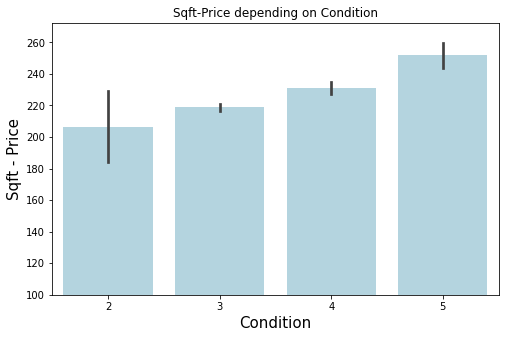

In [39]:
# condition vs sqft price
data_f[['condition', 'sqft_price']].head(20)

# plot
plt.figure()

sc = sns.barplot(data=data_f,
            x = 'condition',
            y = 'sqft_price',
            color='lightblue',
            #hue='price',
            #palette="flare_r",
            )
#ax.bar_label(ax.containers[0])
#plt.grid(True)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Sqft - Price', fontsize=15)
plt.title('Sqft-Price depending on Condition')
plt.ylim(100)

In [40]:
#### changed to count if it doesnt work remove _count

# top 10 zip code becouse of price. Most expensive places

# top and last 10 zipcodes acording to sqft price
zipcode_sqft_price = price_zipcode_count[['zipcode', 'condition', 'sqft_price', 'lat', 'long', 'Count']].sort_values('sqft_price', ascending=False)

top_10_zipcode_sqft_price = zipcode_sqft_price.sort_values('sqft_price', ascending=False).head(10)
#convert zipcode as string
top_10_zipcode_sqft_price['zipcode']=top_10_zipcode_sqft_price['zipcode'].apply(str)

# last 10
last_10_zipcode_sqft_price = zipcode_sqft_price.sort_values('sqft_price', ascending=False).tail(10)
last_10_zipcode_sqft_price['zipcode']=last_10_zipcode_sqft_price['zipcode'].apply(str)


zipcode_sqft_price

zipcode  condition  sqft_price    lat     long  Count
24    98039      3.167     473.567 47.629 -122.231      6
41    98102      3.000     452.542 47.639 -122.321      4
3     98004      3.485     398.884 47.613 -122.202     99
48    98112      3.172     381.745 47.629 -122.298     29
47    98109      3.400     375.013 47.641 -122.351     10
..      ...        ...         ...    ...      ...    ...
0     98001      3.203     142.579 47.315 -122.271    148
2     98003      3.305     142.366 47.318 -122.310     95
13    98023      3.368     135.973 47.309 -122.365    201
20    98032      3.673     133.208 47.371 -122.285     49
1     98002      3.517     127.894 47.309 -122.212     58

[70 rows x 6 columns]

(0.0, 500.0)

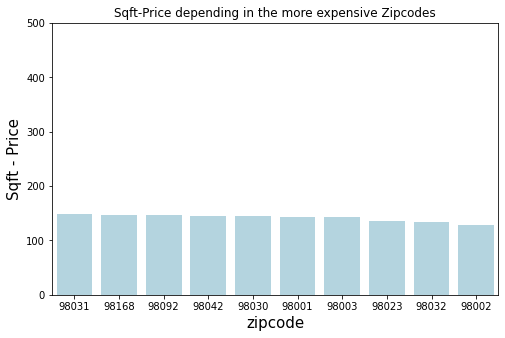

In [42]:
# mean sqft

zipcode_sqft_price_mean=zipcode_sqft_price.sqft_price.mean() #381.47380658524605

#plot 

# plot
plt.figure()

sc = sns.barplot(data=last_10_zipcode_sqft_price, # last
            x = 'zipcode',
            y = 'sqft_price',
            color='lightblue',
            #hue='condition',
            #palette="flare_r",
            )

#ax.bar_label(ax.containers[0])
#plt.grid(True)
plt.xlabel('zipcode', fontsize=15)
plt.ylabel('Sqft - Price', fontsize=15)
plt.title('Sqft-Price depending in the more expensive Zipcodes')
plt.ylim(0, 500)

In [57]:
last_10_zip_list = last_10_zipcode_sqft_price.zipcode.to_list() # list of the last 10 zip codes: 
last_10_zip_list


['98031',
 '98168',
 '98092',
 '98042',
 '98030',
 '98001',
 '98003',
 '98023',
 '98032',
 '98002']

In [44]:
# location of last 10 
last_10_zipcode_sqft_price
fig = px.scatter_mapbox(last_10_zipcode_sqft_price, lat="lat", lon="long", 
                        hover_name="sqft_price", 
                        hover_data=["sqft_price"],
                        #color_discrete_sequence=["blue"], 
                        #color='sqft_price',
                        size='Count',
                        #size='bedrooms',
                        zoom=9, width=800, height=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show() 

## Q: does the size increase the price?

Text(0.5, 1.0, 'Real State Price depending square feet living')

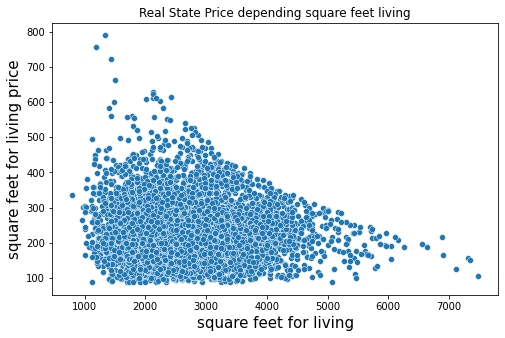

In [45]:
# plotting size(sgft_living) against price (sqft_price) s
# plot
import seaborn as sns
plt.figure()

#
sc = sns.scatterplot(data=data_f,
            x = 'sqft_living', # x = 'sqft_living'
            y = 'sqft_price',
            #hue='condition',
            #palette="viridis",
            #hue_order=(5,8)
            )
#plt.grid(True)
plt.xlabel('square feet for living', fontsize=15)
plt.ylabel('square feet for living price', fontsize=15)
plt.title('Real State Price depending square feet living')

## Q Are the newer houses more expensive?

In [74]:
data_f.head()
# take a subset of the data
yrb_sqft_price = data_f[['yr_built', 'yr_renovated', 'sqft_living', 'sqft_price', 'condition', 'zipcode', 'price']]
# create a new colum boolean renovate
def check_renovation(x):
    if x > 100:
        return int(1) # true
    else:
        return int(0) # false

yrb_sqft_price['renovated'] = yrb_sqft_price.yr_renovated.apply(lambda x: check_renovation(x))
yrb_sqft_price.head() # 7530
#df_weather_year.year = df_weather_year.year.apply(lambda x: str(x))

# separe date renovated / no renovated
renovated = yrb_sqft_price[(yrb_sqft_price['renovated']==1)]
no_renovated = yrb_sqft_price[(yrb_sqft_price['renovated']==0)]


(1900.0, 2020.0)

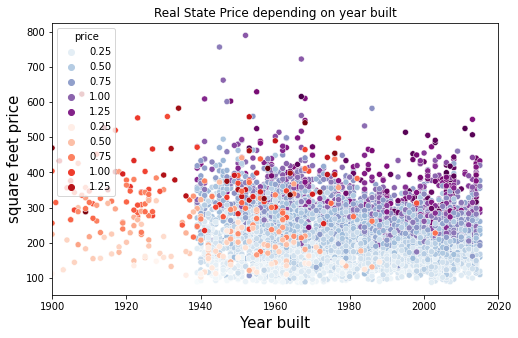

In [80]:
# plot
plt.figure()




sns.scatterplot(data=no_renovated,
            x = 'yr_built', 
            y = 'sqft_price',
            hue='price',
            palette='BuPu',
            )

sns.scatterplot(data=renovated,
            x = 'yr_built', 
            y = 'sqft_price',
            hue='price', 
            palette='Reds'
            )

#plt.grid(True)
plt.xlabel('Year built', fontsize=15)
plt.ylabel('square feet price', fontsize=15)
plt.title('Real State Price depending on year built')
plt.xlim(1900, 2020)

- what about the relation in the last 10

In [83]:
# comparing with the last 10 zip codes last_10_zip_list

# choosing only houses in the last_10_zipcodes

last_10 = yrb_sqft_price[yrb_sqft_price['zipcode'].isin([98031,98168, 98092, 98042, 98030, 98001, 98003, 98023, 98032, 98002])]
last_10.shape #1220

# separing into renovated or not
last_10_renovated = last_10[(last_10['renovated']==1)]
last_10_no_renovated = last_10[(last_10['renovated']==0)]
last_10_no_renovated.head()


yr_built  yr_renovated  sqft_living  sqft_price  condition  zipcode  \
15228      1962         0.000         1940     136.598          3    98031   
19365      1959         0.000         2100     100.476          3    98168   
9450       2001         0.000         4850     117.515          3    98023   
9460       1940         0.000         2250     155.556          4    98030   
5000       1990         0.000         3220     133.540          3    98031   

           price  renovated  
15228 265000.000          0  
19365 211000.000          0  
9450  569950.000          0  
9460  350000.000          0  
5000  430000.000          0

(1900.0, 2020.0)

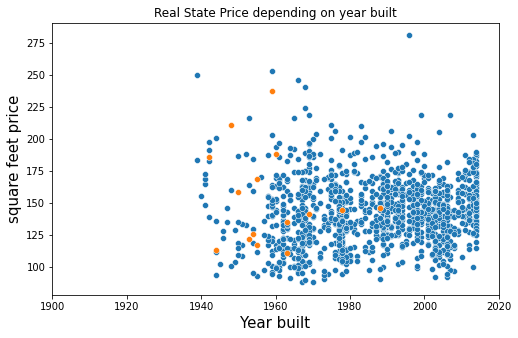

In [87]:
# plot


plt.figure()

sns.scatterplot(data=last_10_no_renovated,
            x = 'yr_built', 
            y = 'sqft_price',
            #hue='price', 
            #palette='BuPu'
            )

sns.scatterplot(data=last_10_renovated,
            x = 'yr_built', 
            y = 'sqft_price',
            #hue='price', 
            #palette='Reds'
            )

#plt.grid(True)
plt.xlabel('Year built', fontsize=15)
plt.ylabel('square feet price', fontsize=15)
plt.title('Real State Price depending on year built')
plt.xlim(1900, 2020)

In [92]:
df2 = pd.DataFrame({
    'zip': ['1', '2'],
    'before': [0.10, 0.20],
    'after': [0.15, 0.35]
})
print(df2)
tidy = df2.melt(id_vars='zip').rename(columns=str.title)
tidy

  zip  before  after
0   1   0.100  0.150
1   2   0.200  0.350


Zip Variable  Value
0   1   before  0.100
1   2   before  0.200
2   1    after  0.150
3   2    after  0.350

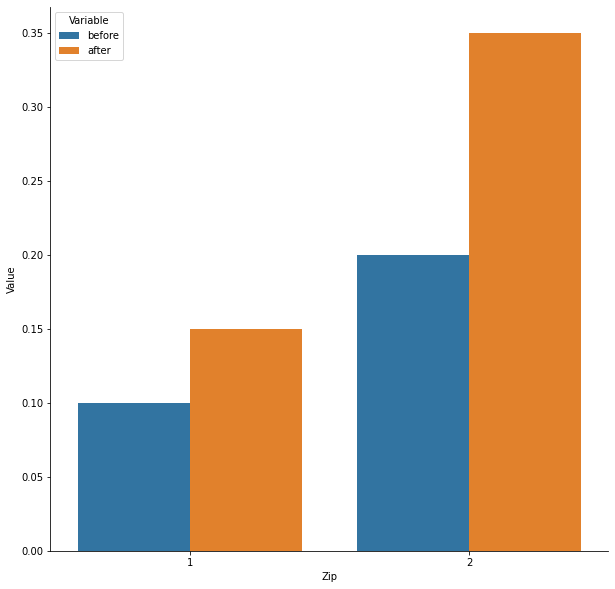

In [94]:
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.barplot(x='Zip', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)